___
# Aula 02 - tipos de variáveis
___


**Preparo Prévio:**
1. Magalhães e Lima, Capítulo 1




___

##  Renda per capita, CO2 de países, e países sem literal

Foram coletados dois dados do site https://www.gapminder.org/:
1. Emissão de CO2 per capita
1. Renda per capita (sendo usado PBI como uma `proxy` de renda)

Nesses *dataframes*, as linhas representam os países, as colunas representam o ano.

No *dataframe* *co2* criado a seguir, o conteúdo de cada célula é a medida de CO2 de um determinado ano (coluna) para determinado país (linha). 

No *dataframe* *income* criado a seguir, o conteúdo de cada célula é a medida de PIB per capita de um determinado ano (coluna) para um determinado país (linha). 

Também usamos as colunas *landlocked* e *region* do primeiro encontro. Neste caso não há uma coluna ano a ano porque este atributo muda só quando mudam as fronteiras de um país.


Como os arquivos estão separados, será preciso juntá-los cruzando o país.

___

## Leitura dos arquivos e mudanças de índices

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
#Leitura dos arquivos em Excel
co2 = pd.read_excel('indicator CDIAC carbon_dioxide_emissions_per_capita.xlsx')
income = pd.read_excel('indicator gapminder gdp_per_capita_ppp.xlsx')
landlocked = pd.read_excel('landlocked_region.xlsx')

### CO2

É possível verificar que cada linha representa um país e as colunas representam o ano


In [3]:
co2.head(3)

,CO2 per capita,1751,1755,1762,1763,1764,1765,1766,1767,1768,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.022704,0.027472,0.03678,0.04709,0.068312,0.131602,0.213325,0.262174,NaN,NaN
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Renda

O mesmo se aplica a renda.

Lembrando que GDP significa *gross domestic product*, ou *produto interno bruto* 

In [4]:

income.head(3)

,GDP per capita,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,...,1173.0,1298.0,1311.0,1548.0,1637.0,1695.0,1893.0,1884.0,1877.0,1925.0
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Landlocked e Region

Lembrando das colunas *landlocked*, que indica se um país tem litoral ou não, e *region*, que  indica a que região pertence

In [5]:
landlocked.head()

,Country,region,landlocked
0,Albania,europe_east,0
1,Algeria,africa_north,0
2,Angola,africa_sub_saharan,0
3,Antigua and Barbuda,america_north,0
4,Argentina,america_south,0


___
### Inner Join

Vamos agora juntar as três tabelas, selecionar apenas o ano de 2010 e remover os NaNs.

Ao final vamos fazer o gráfico de dispersão das duas variáveis.

**Sugestão**: pesquise sobre a função DataFrame.join(), pode ser muito útil no futuro.

mudando o índice do *co2*:

In [6]:
co2_idx = co2.set_index('CO2 per capita')

Mudando o índice do *income*: 



In [7]:
inco_idx = income.set_index('GDP per capita')

Mudando o índice do *landlocked*:

In [8]:
land_idx = landlocked.set_index('Country')

In [9]:
df = co2_idx.join(inco_idx, how='inner', lsuffix='_co2', rsuffix='_income')
df.head(2)

,1751,1755,1762,1763,1764,1765,1766,1767,1768,1769,...,2006_income,2007_income,2008_income,2009_income,2010_income,2011_income,2012_income,2013,2014,2015
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1173.0,1298.0,1311.0,1548.0,1637.0,1695.0,1893.0,1884.0,1877.0,1925.0


Vamos juntar a terceira tabela:

In [10]:
data = df.join(land_idx, how="inner")

Por que no exemplo acima não foi necessário usar prefixos ou sufixos?

In [11]:
data.head(2)

,1751,1755,1762,1763,1764,1765,1766,1767,1768,1769,...,2008_income,2009_income,2010_income,2011_income,2012_income,2013,2014,2015,region,landlocked
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8644.0,8994.0,9374.0,9640.0,9811.0,9961.0,10160.0,10620.0,europe_east,0
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12314.0,12285.0,12494.0,12606.0,12779.0,12893.0,13179.0,13434.0,africa_north,0


### Explorando os índices

Indexação: vamos ver como descobrir se a Argentina é landlocked

In [12]:
data.loc["Argentina", "landlocked"]

0

In [13]:
data["landlocked"]["Argentina"] ## ?

0


#### Atividade 1 

Veja no tutorial como fazer uma seleção só com os países da América do Norte



####  Atividade 2

Qual o valor de *2010_income* que separa os $75\%$ mais ricos?  Monte um DataFrame separado só com os $80\%$ mais ricos segundo a coluna *2010_income*?  

Dica: Veja as funções [quantile](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.quantile.html) e [percentile](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.percentile.html)

#### Atividade 3

Use um recurso apropriado para visualizar a coluna 'GDPcapita'. Justifique

#### Atividade 4 - GDPCapitaOrdinal

Particione a coluna GPCapita em 10 seções. Guarde a coluna de volta no DataFrame como GDPCapitaOrdinal

Dica: use `pd.cut()`

#### Atividade 4.1

 Apresente a tabela de frequência da GDPCapitaOrdinal

#### Atividade 5


#### 5.1 
Você foi encarregado de responder se a  seguinte afirmação é verdadeira ou falsa: a taxa de fertilidade é maior em regiões menos desenvolvidas do mundo.

Responda visualizando GDPCapita (versão quantitativa) versus taxa de fertilidade. Lembre-se do diagrama de dispersão visto na aula passada.




#### 5.2

Adote um outro enfoque: cruze o GDP per capita em sua versão categória por regiões.

Para visualizar melhor é mais útil ver a versão absoluta ou relativa? 

É mais útil que a tabela toda some 100%, ou somar 100% por região? *como se faz isso?*


#### Atividade 6 - análise livre

Vá ao site [gapminder.org](http://www.gapminder.org) e escolha uma variável quantitativa

Visualize esta variável usando histograma *e* boxplot.

Classifique o comportamento desta variável em relação a assimetrias e apresente as principais medidas-resumo: média, mediana e desvio padrão


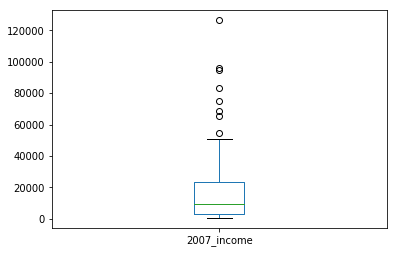

In [14]:
data.loc[:, "2007_income"].plot.box()

#### Atividade 7 - cruzamento de dados

A variável estudada na atividade anterior tem seu valor influenciado pela região ou pelo GDP per capita? Estude ambas as hipóteses